In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [2]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_csv('international-airline-passengers.csv')
df.head()

Month  \
0  1949-01   
1  1949-02   
2  1949-03   
3  1949-04   
4  1949-05   

   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  
0                                              112.0                               
1                                              118.0                               
2                                              132.0                               
3                                              129.0                               
4                                              121.0

In [4]:
df = df.drop(df.index[144])
df['Month'] = pd.to_datetime(df['Month'],yearfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                                                                             144 non-null datetime64[ns]
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    144 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [5]:
df.index = df['Month']
df = df.drop('Month',axis=1)
df.columns = ['Passengers']
df.head()

Passengers
Month                 
1949-01-01       112.0
1949-02-01       118.0
1949-03-01       132.0
1949-04-01       129.0
1949-05-01       121.0

In [12]:
y = df['Passengers'].resample('MS').mean()
print(y)
df.plot()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
1949-06-01    135.0
1949-07-01    148.0
1949-08-01    148.0
1949-09-01    136.0
1949-10-01    119.0
1949-11-01    104.0
1949-12-01    118.0
1950-01-01    115.0
1950-02-01    126.0
1950-03-01    141.0
1950-04-01    135.0
1950-05-01    125.0
1950-06-01    149.0
1950-07-01    170.0
1950-08-01    170.0
1950-09-01    158.0
1950-10-01    133.0
1950-11-01    114.0
1950-12-01    140.0
1951-01-01    145.0
1951-02-01    150.0
1951-03-01    178.0
1951-04-01    163.0
1951-05-01    172.0
1951-06-01    178.0
              ...  
1958-07-01    491.0
1958-08-01    505.0
1958-09-01    404.0
1958-10-01    359.0
1958-11-01    310.0
1958-12-01    337.0
1959-01-01    360.0
1959-02-01    342.0
1959-03-01    406.0
1959-04-01    396.0
1959-05-01    420.0
1959-06-01    472.0
1959-07-01    548.0
1959-08-01    559.0
1959-09-01    463.0
1959-10-01    407.0
1959-11-01    362.0
1959-12-01    405.0
1960-01-01    

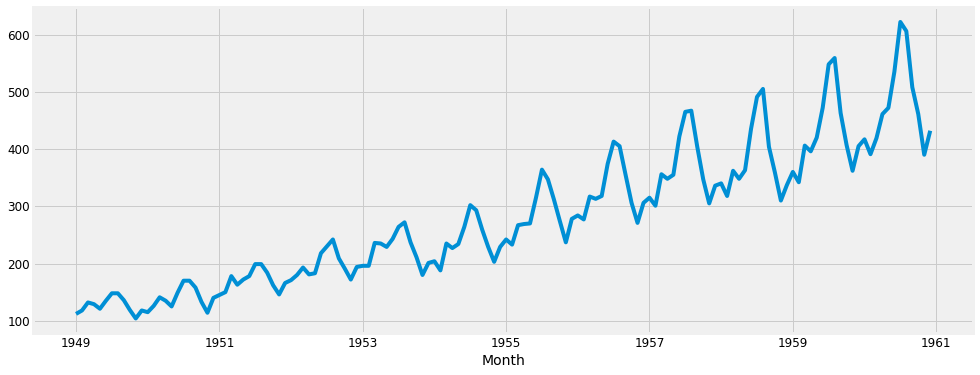

In [13]:
y.plot(figsize=(15, 6))
plt.show()

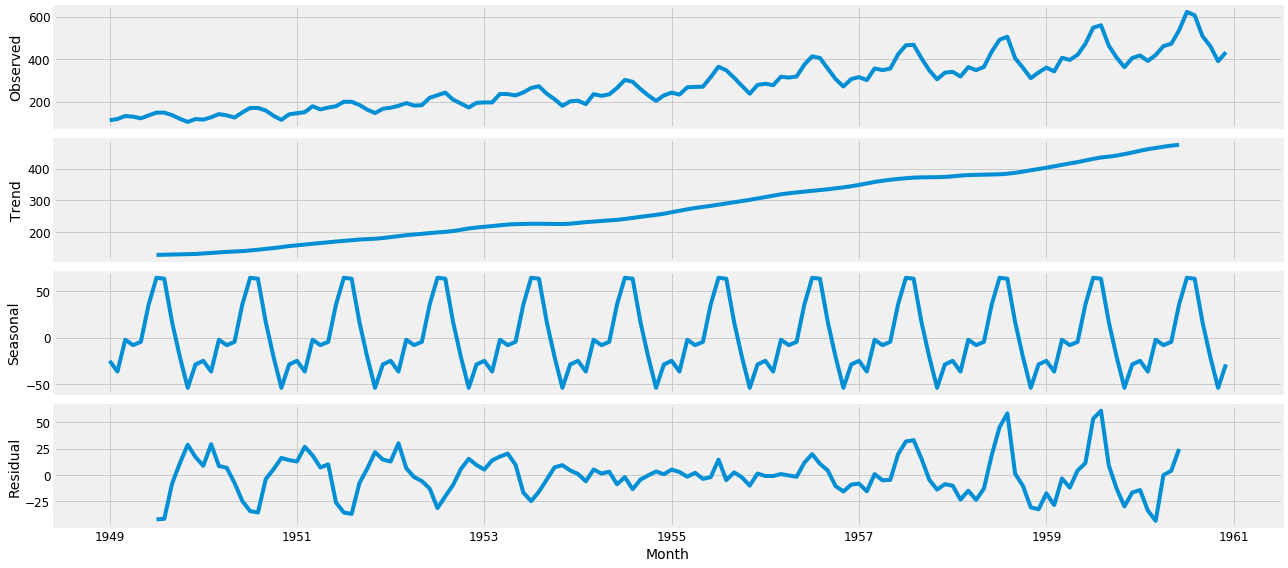

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\dstoops\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2661      0.407     -0.654      0.513      -1.064       0.532
ma.L1         -0.0489      0.387     -0.126      0.900      -0.808       0.710
ar.S.L12      -0.1488      0.097     -1.528      0.127      -0.340       0.042
sigma2       144.3335     17.843      8.089      0.000     109.362     179.305


In [17]:
print(results.mle_retvals)

{'fopt': 3.199915350114805, 'gopt': array([ 3.90856236e-06,  1.03228537e-06, -2.97264435e-06,  3.05804271e-06]), 'fcalls': 75, 'warnflag': 0, 'converged': True, 'iterations': 11}


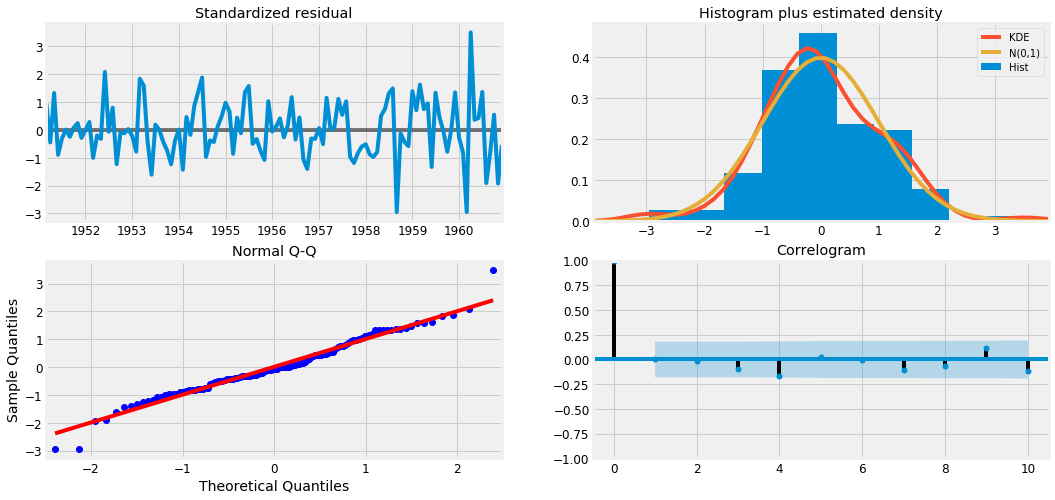

In [18]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

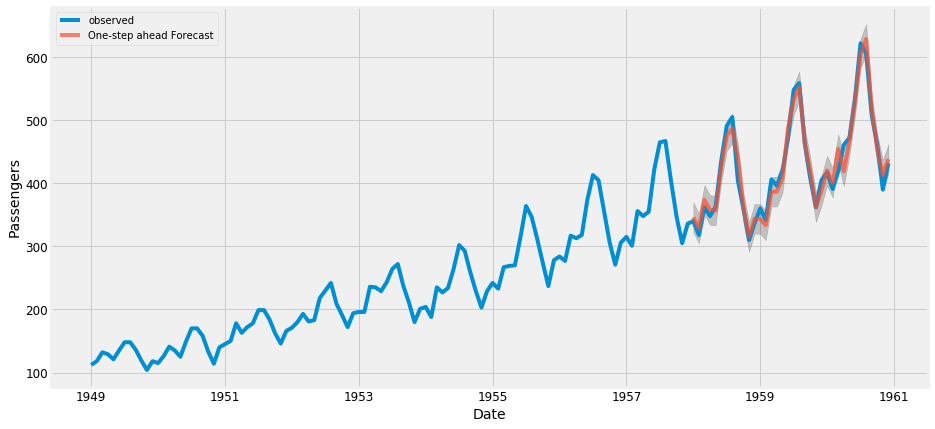

In [19]:
pred = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1949':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['1959-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 271.8
The Root Mean Squared Error of our forecasts is 16.49


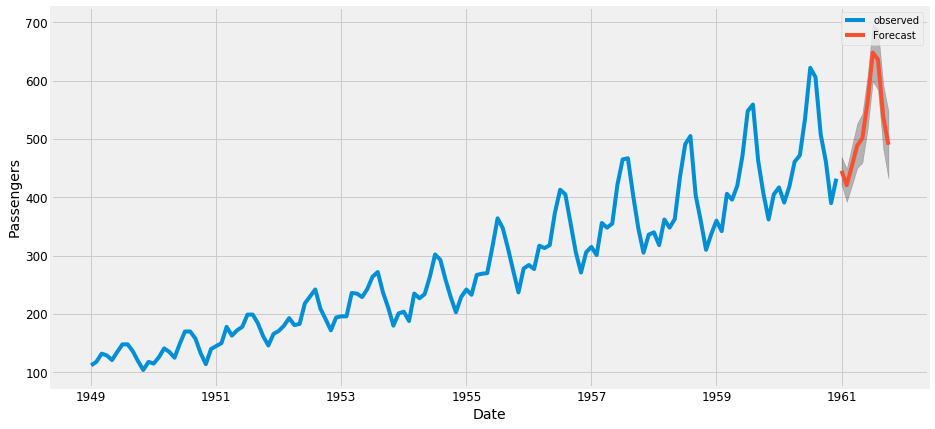

In [22]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

In [23]:
print(pred_ci)

            lower Passengers  upper Passengers
1961-01-01        422.041118        469.134687
1961-02-01        392.249950        449.333116
1961-03-01        420.346877        487.944285
1961-04-01        450.311324        526.504393
1961-05-01        459.327144        543.357405
1961-06-01        517.121545        608.289091
1961-07-01        599.172068        696.964491
1961-08-01        584.089260        688.083596
1961-09-01        483.460518        593.307616
1961-10-01        432.343037        547.746335
